# **Imports**

In [18]:
import tensorflow as tf
import cv2
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neighbors import NearestCentroid
from sklearn.neighbors import KNeighborsClassifier


# **Dataset-Samples**

**Κάνουμε load τα δεδομένα της cifar10 και δημιουργούμε 2 tuples, που το ένα περιέχει τα δεδομένα που θέλουμε να κάνουμε train και τα labels τους και το άλλο περιέχει τα δεδομένα που θέλουμε να κάνουμε test μαζί με τα labels τους.**

In [20]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data() 

**Παίρνουμε μία ιδέα για το πως ακριβώς ειναι τα δείγματα μας και τι περιέχουν**

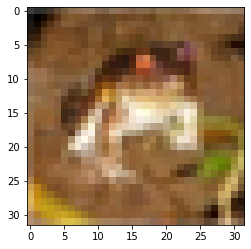

In [21]:
plt.imshow(x_train[0])

# **OPTIONAL:**

**Μετατρέπουμε σε grayscale το training και το test sample για να μειωθούν οι διαστάσεις τους (πχ. το x_train απο (50000,32,32,3) σε (50000,**32**,32) , δηλαδή να αντικαταστήσουμε το RGB που θέλει 3 νούμερα με grayscale) ώστε να έχουμε καλύτερο runtime και ιδανικά παρόμοιες/ίδιες αποδόσεις**

In [22]:
x_train = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in x_train])
x_test = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in x_test])
print(x_train.shape)

(50000, 32, 32)


**Βλέπουμε πως είναι το grayscale image**

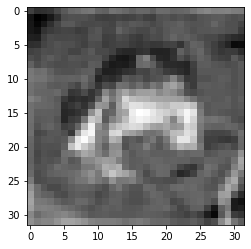

In [24]:
plt.imshow(x_train[0], cmap='gray')

**Optional normalize στο dataset , αφού ξέρουμε ότι η φωτεινότητα του κάθε pixel αναπαριστάτε με έναν αριθμό από το 0 μέχρι το 255**

In [ ]:
x_train  = x_train/255
x_test  = x_test/255

# **Dimensions**
**Κάνουμε reshape τις διαστάσεις του x_train και x_test ώστε να μπορώ να τα εισάγω στον αλγόριθμο(πχ. το x_train από (50000,32,32,3) σε (50000, 32x32x3) = (50000,3072) ή με grayscale (50000,1024)**

In [10]:
x_train = np.reshape(x_train, (x_train.shape[0], -1))
x_test =np.reshape(x_test, (x_test.shape[0], -1))
print(x_train.shape)


(50000, 1024)


# **K-Nearest Neighbor**

**Υλοποιούμε το K.N.N. με τις παραμέτρους που θέλουμε να κάνει train αργότερα**


*   **number of neighbors = k**
*   **weights = distance(ο κάθε neighbor έχει μεγαλύτερη ισχύ με βάση του πόσο κοντά είναι στο δείγμα) ή uniform (δεν παίζει ρόλο η τιμή της απόστασης)**
*   **algorithm = "Auto" ώστε να διαλέξει αναλόγως του sample size και των dimensions αυτού αυτόματα τον "καλύτερο" αλγόριθμο εκ των εξής : KD-Tree, Ball Tree και Brute Force**
*   **metric = διαλέγουμε όποια μετρική μας βολεύει για το δείγμα μας με στόχο να μικρύνουμε το runtime ή να πάρουμε ίσως καλύτερα αποτελέσματα**

In [11]:
knn = KNeighborsClassifier(n_neighbors=3, weights='uniform', algorithm='auto', metric="euclidean")

**Κάνουμε fit τα δεδομένα του trainset στο μοντέλο**

In [12]:
knn.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

**Βρίσκουμε το μέσο accuracy του μοντέλου στο test set**

In [13]:
acc = knn.score(x_test,y_test)
print(acc)

0.2951


# **Nearest Centroid**

**Υλοποιούμε το Nearest Centroid με τις παραμέτρους που θέλουμε**

In [14]:
nearC = NearestCentroid(metric="euclidean",shrink_threshold=None) 

**Αντίστοιχα κάνουμε fit**




In [15]:
nearC.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


NearestCentroid(metric='euclidean', shrink_threshold=None)

**Αντίστοιχα βρίσκουμε το μέσο accuracy του μοντέλου στο test set**

In [16]:
acc = nearC.score(x_test,y_test)
print(acc)

0.2517
